In [1]:
import math
import io

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
matplotlib.rcParams['figure.dpi'] = 100

# Diagnostics

Use `./run.sh` in the root directory to dump diagnostic variables to `simple-toplogy-stderr.txt`. Then use this notebook for plots


## Packet Ack Diagnostics

(stuff we collect on every ack). 

plots are shaded green when the algorithm is learning

In [2]:
# Get data for every ACK
ack_data = "".join(i for i in open("../simple-topology-stderr.txt") if "ack" in i)
df_ack = pd.read_csv(io.StringIO(ack_data))
df_ack = df_ack.drop("ack", axis=1)
df_ack.columns = ["time", "variable", "value"]
df_ack = df_ack.pivot(index="time", columns="variable", values="value")
df_ack = df_ack.reindex(sorted(df_ack.columns), axis=1)

# Get data for every execution of Learn()
learn_data = "".join(i for i in open("../simple-topology-stderr.txt") if "learn" in i)
df_learn = pd.read_csv(io.StringIO(learn_data))
df_learn = df_learn.drop("learn", axis=1)
df_learn.columns = ["time", "variable", "value"]
df_learn = df_learn.pivot(index="time", columns="variable", values="value")
df_learn = df_learn.reindex(sorted(df_learn.columns), axis=1)

In [3]:
df_ack.describe()

variable,ackTimeAvg,delay,packetTimeAvg,rttRatio,ssthresh,state0,state1,state2,state3,throughput,utility
count,231409.000000,231410.000000,231410.000000,231410.000000,2.314100e+05,231410.000000,231410.000000,231410.000000,231410.000000,231410.000000,231410.000000
mean,5.188330,72.060002,5.188058,1.451124,2.488267e+06,0.000181,0.000130,0.288380,0.002213,3628.439199,3.926731
std,2.845515,9.932865,2.852242,0.198663,1.009819e+08,0.025289,0.019052,0.703334,0.094049,269.837348,0.127119
min,1.720000,50.000000,1.720000,1.000000,5.898700e+04,0.000000,0.000000,0.000000,0.000000,1815.000000,2.708050
25%,4.030000,68.000000,4.030000,1.370000,1.216050e+05,0.000000,0.000000,0.000000,0.000000,3630.000000,3.977480
50%,4.030000,68.000000,4.030000,1.370000,1.216050e+05,0.000000,0.000000,0.000000,0.000000,3630.000000,3.977480
75%,4.040000,68.000000,4.040000,1.370000,1.216050e+05,0.000000,0.000000,0.000000,0.000000,3630.000000,3.977480
max,103.000000,121.000000,152.000000,2.430000,4.294970e+09,9.000000,7.000000,3.000000,4.000000,119790.000000,7.160900


In [4]:
df_learn.describe()

variable,action,reward
count,230994.000000,230995.000000
mean,-0.861096,1.999688
std,0.350571,0.035308
min,-1.000000,-2.000000
25%,-1.000000,2.000000
50%,-1.000000,2.000000
75%,-1.000000,2.000000
max,20.000000,2.000000


In [5]:
def plot_learn_events(ax):
    ax.vlines(df_learn.index, *ax.get_ylim(), color="white", alpha=0.1, linewidth=0.5)

Text(0.5, 1.0, 'State Variables')

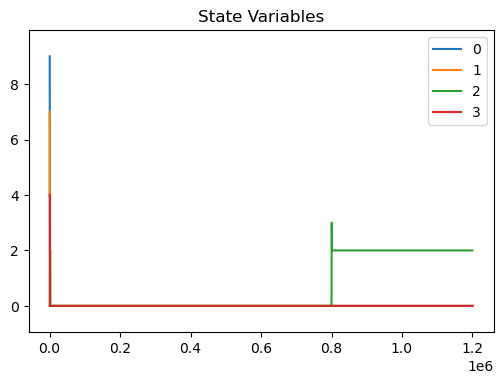

In [6]:
state_cols = [i for i in df_ack.columns if "state" in i]
fig, ax = plt.subplots()
for i, col in enumerate(state_cols):
    ax.plot(df_ack.index, df_ack[col], label=i)
plot_learn_events(ax)
ax.legend()
ax.set_title("State Variables")

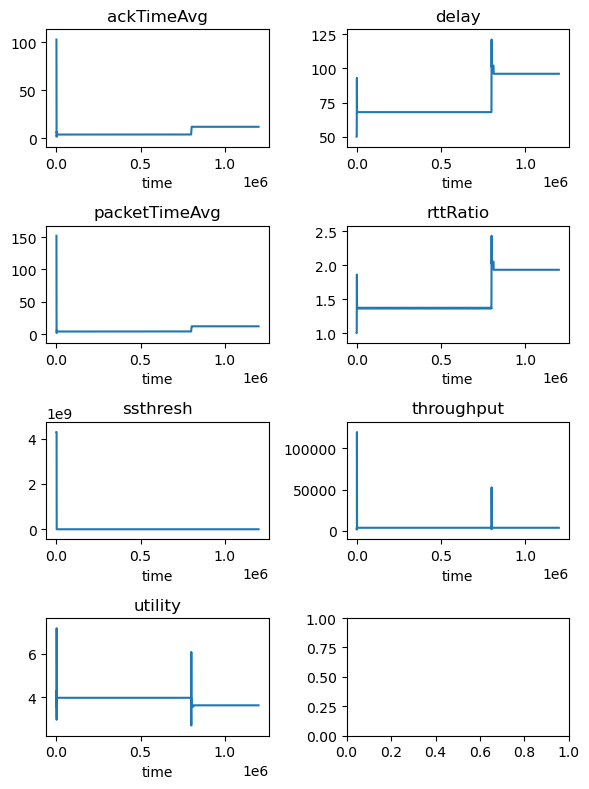

In [7]:
cols_to_plot = [i for i in df_ack.columns if "state" not in i]
n_rows = math.ceil(len(cols_to_plot) / 2)
fig, axs = plt.subplots(n_rows, 2, figsize=(6, 2 * n_rows))

for i, col in enumerate(cols_to_plot):
    ax = axs.flatten()[i]
    df_ack.plot(y=col, use_index=True, ax=ax, legend=None)
    plot_learn_events(ax)
    ax.set_title(col)
fig.tight_layout()

## Learn diagnostics

(Stuff we collect every time the FuzzyKanerva function is executed)

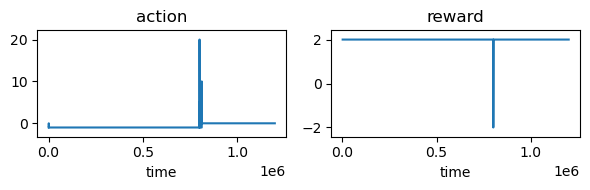

In [10]:
cols_to_plot = [i for i in df_learn.columns if "state" not in i]
n_cols = math.ceil(len(cols_to_plot) / 2)
fig, axs = plt.subplots(n_cols, 2, figsize=(6, 2 * n_cols))

for i, col in enumerate(cols_to_plot):
    ax = axs.flatten()[i]
    df_learn.plot(y=col, use_index=True, ax=ax, legend=None)
    plot_learn_events(ax)
    ax.set_title(col)
fig.tight_layout()

## TCP Comparison plots

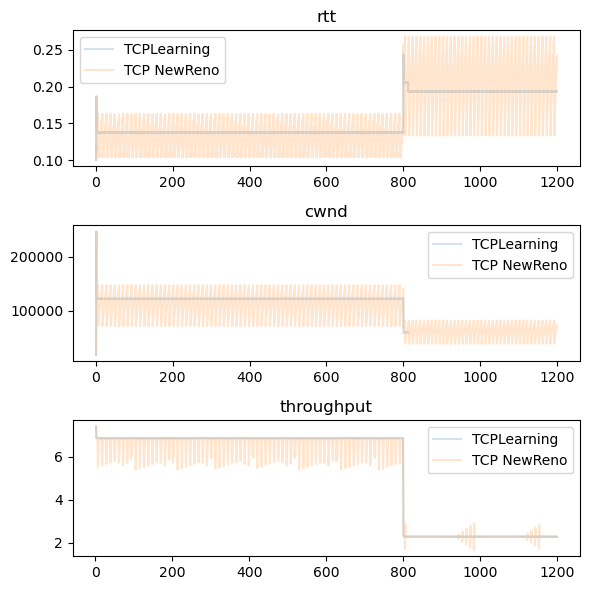

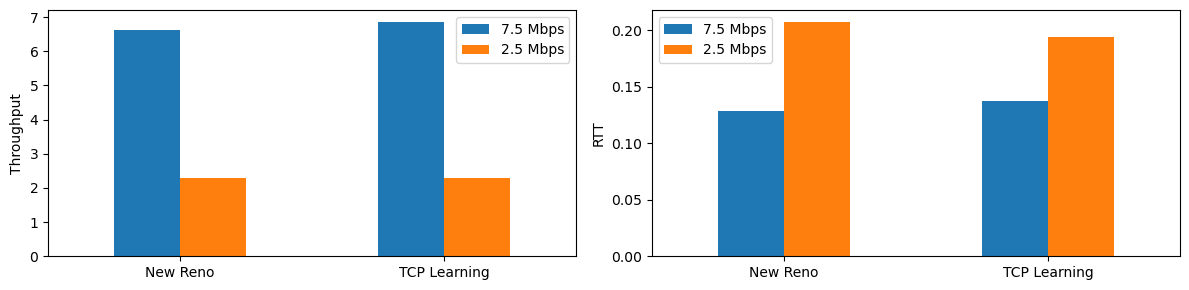

In [9]:
# plot RTT, cwnd, througput for both learning and reno
rtt_data_learning = "".join(i for i in open("../learning-rtt.data"))
rtt_data_reno = "".join(i for i in open("../reno-rtt.data"))

cwnd_data_learning = "".join(i for i in open("../learning-cwnd.data"))
cwnd_data_reno = "".join(i for i in open("../reno-cwnd.data"))

tp_data_learning = "".join(i for i in open("../learning-throughput.data"))
tp_data_reno = "".join(i for i in open("../reno-throughput.data"))

df_rtt_learning = pd.read_csv(io.StringIO(rtt_data_learning), delim_whitespace=True)
df_rtt_reno = pd.read_csv(io.StringIO(rtt_data_reno), delim_whitespace=True)
df_rtt_learning.columns = ["time", "rtt"]
df_rtt_reno.columns = ["time", "rtt"]

df_cwnd_learning = pd.read_csv(io.StringIO(cwnd_data_learning), delim_whitespace=True)
df_cwnd_reno = pd.read_csv(io.StringIO(cwnd_data_reno), delim_whitespace=True)
df_cwnd_learning.columns = ["time", "cwnd"]
df_cwnd_reno.columns = ["time", "cwnd"]

df_tp_learning = pd.read_csv(io.StringIO(tp_data_learning), delim_whitespace=True)
df_tp_reno = pd.read_csv(io.StringIO(tp_data_reno), delim_whitespace=True)
df_tp_learning.columns = ["time", "throughput"]
df_tp_reno.columns = ["time", "throughput"]

df_to_plot = [[df_rtt_learning, df_rtt_reno], [df_cwnd_learning, df_cwnd_reno], [df_tp_learning, df_tp_reno]]
cols = ["rtt", "cwnd", "throughput"]
n_rows = len(df_to_plot)
fig, axs = plt.subplots(n_rows, 1, figsize=(6, 2* n_rows))

for i, df in enumerate(df_to_plot):
    ax = axs.flatten()[i]
    ax.plot(df[0]["time"], df[0][cols[i]], label="TCPLearning", alpha=0.2)
    ax.plot(df[1]["time"], df[1][cols[i]], label="TCP NewReno", alpha=0.2)
    ax.set_title(cols[i])
    ax.legend()
fig.tight_layout()

algorithm = ["New Reno", "TCP Learning"]
avg_tp_unrestricted = [np.mean(np.array(df_tp_reno["throughput"])[np.where(np.array(df_tp_reno["time"]) <= 800.0)]),
                      np.mean(np.array(df_tp_learning["throughput"])[np.where(np.array(df_tp_learning["time"]) <= 800.0)])]
avg_tp_restricted = [np.mean(np.array(df_tp_reno["throughput"])[np.where(np.array(df_tp_reno["time"]) > 800.0)]),
                      np.mean(np.array(df_tp_learning["throughput"])[np.where(np.array(df_tp_learning["time"]) > 800.0)])]

avg_rtt_unrestricted = [np.mean(np.array(df_rtt_reno["rtt"])[np.where(np.array(df_rtt_reno["time"]) <= 800.0)]),
                      np.mean(np.array(df_rtt_learning["rtt"])[np.where(np.array(df_rtt_learning["time"]) <= 800.0)])]
avg_rtt_restricted = [np.mean(np.array(df_rtt_reno["rtt"])[np.where(np.array(df_rtt_reno["time"]) > 800.0)]),
                      np.mean(np.array(df_rtt_learning["rtt"])[np.where(np.array(df_rtt_learning["time"]) > 800.0)])]


fig, axs = plt.subplots(1, 2, figsize=(6 * 2, 3))

axs_flat = axs.flatten()
df_tp = pd.DataFrame(np.c_[avg_tp_unrestricted, avg_tp_restricted], index=algorithm)
df_tp.plot.bar(ax=axs_flat[0], rot=0)
axs_flat[0].legend(('7.5 Mbps', '2.5 Mbps'), loc = "upper right")
axs_flat[0].set_ylabel("Throughput")

df_rtt = pd.DataFrame(np.c_[avg_rtt_unrestricted, avg_rtt_restricted], index=algorithm)
df_rtt.plot.bar(ax=axs_flat[1], rot=0)
axs_flat[1].legend(('7.5 Mbps', '2.5 Mbps'), loc = "upper left")
axs_flat[1].set_ylabel("RTT")
fig.tight_layout()